In [1]:
import cv2
import torch
import numpy as np

cap = cv2.VideoCapture('/home/louis/Documents/gatech/Summer2023/Multimodal-Deep-Regression/data/video_packs/video_pack_1000/7117343959055191302.mp4')

frames = []
frame_count = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, (72, 128))  
    frame = frame.transpose((2, 0, 1)) 
    frames.append(frame)
    frame_count += 1
    if frame_count >= 5:
        break

cap.release()

#frames = [np.array(frame)/255 for frame in frames]  # Normalizing data
frames = np.stack(frames)  
frames = np.transpose(frames, (1, 0, 2, 3))  
input_data = input_data.unsqueeze(0) 
input_data.size()

torch.Size([1, 3, 5, 128, 72])

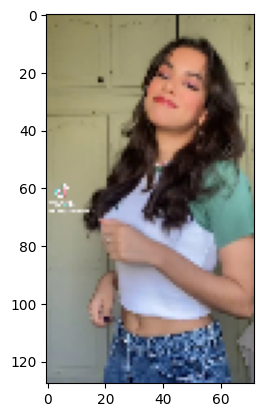

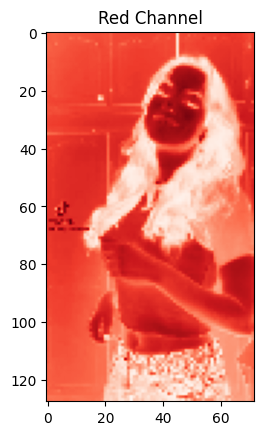

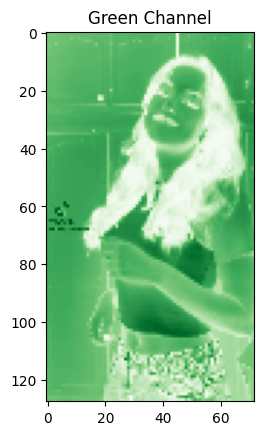

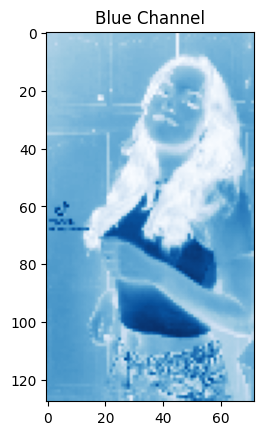

In [2]:
import matplotlib.pyplot as plt

# select the video & frame
video = 1
frame = 3

# select a frame
image_tensor = input_data[0] [:,frame,:,:]
numpy_image = image_tensor.detach().numpy()

# imshow (Height, Width, Channels)
numpy_image = numpy_image.transpose((1, 2, 0))

# normalize to 0,1
numpy_image = (numpy_image - numpy_image.min()) / (numpy_image.max() - numpy_image.min())

plt.imshow(numpy_image)
plt.show()

# Red channel
plt.imshow(numpy_image[:,:,0], cmap='Reds')
plt.title("Red Channel")
plt.show()

# Green channel
plt.imshow(numpy_image[:,:,1], cmap='Greens')
plt.title("Green Channel")
plt.show()

# Blue channel
plt.imshow(numpy_image[:,:,2], cmap='Blues')
plt.title("Blue Channel")
plt.show()

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import os
import random
import time

# Create Batches with DataLoaders
batch_size = 1
train_loader = list(zip(input_data, input_data)) #TensorDataset(x_train, y_train)
train_loader = DataLoader(train_loader, batch_size=batch_size, shuffle=True)

In [4]:
# This need to same as the main & preprocess
frames_to_skip=200 # how many frame to skip, reduce depth
shrink=8 # shrink H x W, the higher the smaller scale
normalize=False # normalize the pixel to 0 to 1

In [5]:
H = 1024//shrink
W = 576//shrink
H,W

(128, 72)

In [6]:
import torch
import matplotlib.pyplot as plt

def check():
    outputs = model(input_data.to(torch.float32))

    # select a frame
    image_tensor = outputs.squeeze()[:,3,:,:]
    numpy_image = image_tensor.detach().numpy()

    # imshow (Height, Width, Channels)
    numpy_image = numpy_image.transpose((1, 2, 0))

    # normalize to 0,1
    numpy_image = (numpy_image - numpy_image.min()) / (numpy_image.max() - numpy_image.min())

    plt.imshow(numpy_image)
    plt.show()

Total parameters: 262,883
First epoch took 0.0 minutes.
Epoch 1/100, Train_Loss: 2884.45, Avg: 2884.45
Epoch 2/100, Train_Loss: 2882.40, Avg: 2882.40
Epoch 3/100, Train_Loss: 2880.35, Avg: 2880.35
Epoch 4/100, Train_Loss: 2878.27, Avg: 2878.27
Epoch 5/100, Train_Loss: 2876.10, Avg: 2876.10
Epoch 6/100, Train_Loss: 2873.80, Avg: 2873.80
Epoch 7/100, Train_Loss: 2871.32, Avg: 2871.32
Epoch 8/100, Train_Loss: 2868.61, Avg: 2868.61
Epoch 9/100, Train_Loss: 2865.62, Avg: 2865.62
Epoch 10/100, Train_Loss: 2862.27, Avg: 2862.27


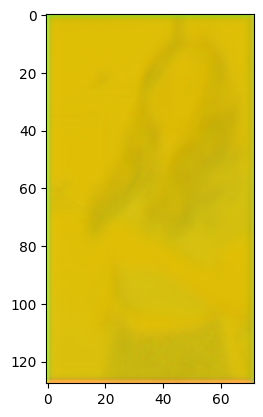

Epoch 11/100, Train_Loss: 2858.51, Avg: 2858.51
Epoch 12/100, Train_Loss: 2854.22, Avg: 2854.22
Epoch 13/100, Train_Loss: 2849.31, Avg: 2849.31
Epoch 14/100, Train_Loss: 2843.68, Avg: 2843.68
Epoch 15/100, Train_Loss: 2837.18, Avg: 2837.18
Epoch 16/100, Train_Loss: 2829.67, Avg: 2829.67
Epoch 17/100, Train_Loss: 2820.99, Avg: 2820.99
Epoch 18/100, Train_Loss: 2811.00, Avg: 2811.00
Epoch 19/100, Train_Loss: 2799.53, Avg: 2799.53
Epoch 20/100, Train_Loss: 2786.38, Avg: 2786.38


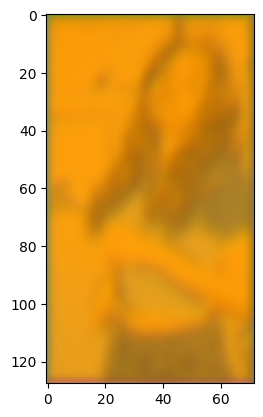

Epoch 21/100, Train_Loss: 2771.27, Avg: 2771.27
Epoch 22/100, Train_Loss: 2753.68, Avg: 2753.68
Epoch 23/100, Train_Loss: 2733.15, Avg: 2733.15
Epoch 24/100, Train_Loss: 2709.33, Avg: 2709.33
Epoch 25/100, Train_Loss: 2681.83, Avg: 2681.83
Epoch 26/100, Train_Loss: 2650.09, Avg: 2650.09
Epoch 27/100, Train_Loss: 2613.54, Avg: 2613.54
Epoch 28/100, Train_Loss: 2571.85, Avg: 2571.85
Epoch 29/100, Train_Loss: 2524.89, Avg: 2524.89
Epoch 30/100, Train_Loss: 2472.64, Avg: 2472.64


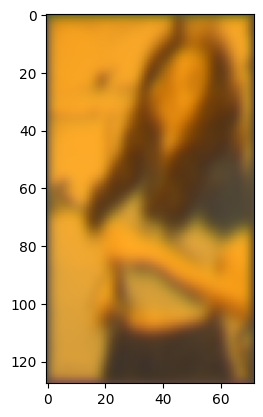

Epoch 31/100, Train_Loss: 2414.89, Avg: 2414.89
Epoch 32/100, Train_Loss: 2352.26, Avg: 2352.26
Epoch 33/100, Train_Loss: 2285.82, Avg: 2285.82
Epoch 34/100, Train_Loss: 2216.28, Avg: 2216.28
Epoch 35/100, Train_Loss: 2144.53, Avg: 2144.53
Epoch 36/100, Train_Loss: 2070.60, Avg: 2070.60
Epoch 37/100, Train_Loss: 1994.20, Avg: 1994.20
Epoch 38/100, Train_Loss: 1915.54, Avg: 1915.54
Epoch 39/100, Train_Loss: 1835.32, Avg: 1835.32
Epoch 40/100, Train_Loss: 1756.44, Avg: 1756.44


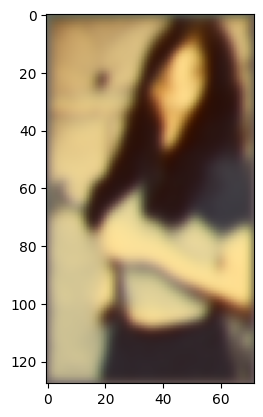

Epoch 41/100, Train_Loss: 1686.46, Avg: 1686.46
Epoch 42/100, Train_Loss: 1629.08, Avg: 1629.08
Epoch 43/100, Train_Loss: 1574.98, Avg: 1574.98
Epoch 44/100, Train_Loss: 1536.94, Avg: 1536.94
Epoch 45/100, Train_Loss: 1507.81, Avg: 1507.81
Epoch 46/100, Train_Loss: 1479.72, Avg: 1479.72
Epoch 47/100, Train_Loss: 1457.65, Avg: 1457.65
Epoch 48/100, Train_Loss: 1431.96, Avg: 1431.96
Epoch 49/100, Train_Loss: 1406.62, Avg: 1406.62
Epoch 50/100, Train_Loss: 1379.83, Avg: 1379.83


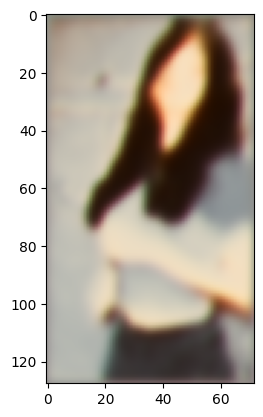

Epoch 51/100, Train_Loss: 1345.75, Avg: 1345.75
Epoch 52/100, Train_Loss: 1309.64, Avg: 1309.64
Epoch 53/100, Train_Loss: 1270.63, Avg: 1270.63
Epoch 54/100, Train_Loss: 1242.87, Avg: 1242.87
Epoch 55/100, Train_Loss: 1220.29, Avg: 1220.29
Epoch 56/100, Train_Loss: 1204.65, Avg: 1204.65
Epoch 57/100, Train_Loss: 1178.91, Avg: 1178.91
Epoch 58/100, Train_Loss: 1151.50, Avg: 1151.50
Epoch 59/100, Train_Loss: 1125.96, Avg: 1125.96
Epoch 60/100, Train_Loss: 1109.40, Avg: 1109.40


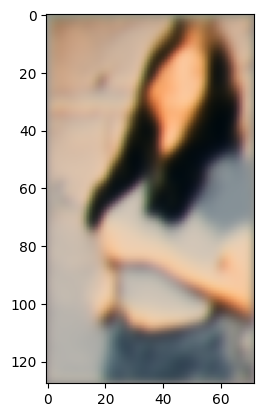

Epoch 61/100, Train_Loss: 1096.31, Avg: 1096.31
Epoch 62/100, Train_Loss: 1085.72, Avg: 1085.72
Epoch 63/100, Train_Loss: 1073.83, Avg: 1073.83
Epoch 64/100, Train_Loss: 1060.96, Avg: 1060.96
Epoch 65/100, Train_Loss: 1046.46, Avg: 1046.46
Epoch 66/100, Train_Loss: 1033.19, Avg: 1033.19
Epoch 67/100, Train_Loss: 1021.33, Avg: 1021.33
Epoch 68/100, Train_Loss: 1010.43, Avg: 1010.43
Epoch 69/100, Train_Loss: 997.94, Avg: 997.94
Epoch 70/100, Train_Loss: 982.57, Avg: 982.57


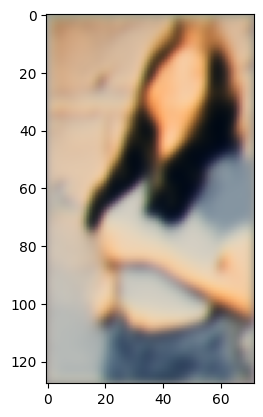

Epoch 71/100, Train_Loss: 968.30, Avg: 968.30
Epoch 72/100, Train_Loss: 956.71, Avg: 956.71
Epoch 73/100, Train_Loss: 947.24, Avg: 947.24
Epoch 74/100, Train_Loss: 937.30, Avg: 937.30
Epoch 75/100, Train_Loss: 925.53, Avg: 925.53
Epoch 76/100, Train_Loss: 914.40, Avg: 914.40
Epoch 77/100, Train_Loss: 905.18, Avg: 905.18
Epoch 78/100, Train_Loss: 896.95, Avg: 896.95
Epoch 79/100, Train_Loss: 888.02, Avg: 888.02
Epoch 80/100, Train_Loss: 878.29, Avg: 878.29


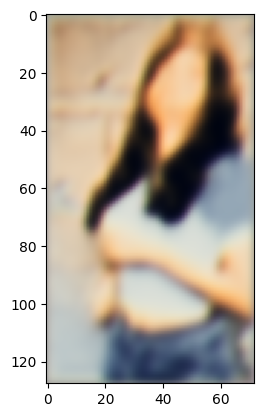

Epoch 81/100, Train_Loss: 868.83, Avg: 868.83
Epoch 82/100, Train_Loss: 861.10, Avg: 861.10
Epoch 83/100, Train_Loss: 859.02, Avg: 859.02
Epoch 84/100, Train_Loss: 860.55, Avg: 860.55
Epoch 85/100, Train_Loss: 862.13, Avg: 862.13
Epoch 86/100, Train_Loss: 827.95, Avg: 827.95
Epoch 87/100, Train_Loss: 847.00, Avg: 847.00
Epoch 88/100, Train_Loss: 840.72, Avg: 840.72
Epoch 89/100, Train_Loss: 815.88, Avg: 815.88
Epoch 90/100, Train_Loss: 835.56, Avg: 835.56


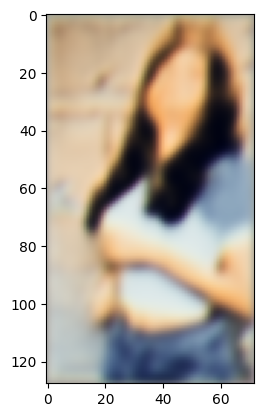

Epoch 91/100, Train_Loss: 795.50, Avg: 795.50
Epoch 92/100, Train_Loss: 811.86, Avg: 811.86
Epoch 93/100, Train_Loss: 783.21, Avg: 783.21
Epoch 94/100, Train_Loss: 799.18, Avg: 799.18
Epoch 95/100, Train_Loss: 774.50, Avg: 774.50
Epoch 96/100, Train_Loss: 783.69, Avg: 783.69
Epoch 97/100, Train_Loss: 763.18, Avg: 763.18
Epoch 98/100, Train_Loss: 771.84, Avg: 771.84
Epoch 99/100, Train_Loss: 754.06, Avg: 754.06
Epoch 100/100, Train_Loss: 758.73, Avg: 758.73


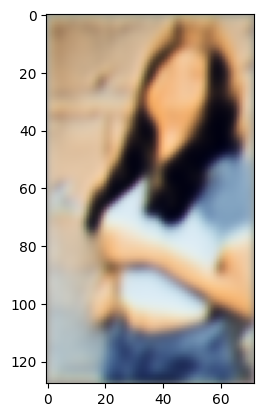

In [7]:
import sys
sys.path.append("..")
from models import ConvLSTMAutoencoder
from util.utilities import train, evaluate, get_device

model = ConvLSTMAutoencoder(hidden_dim=32, shrink=shrink, normalize=normalize)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")

EPOCHS = 100

train_losses = []
val_losses = []
start_time = time.time()

for epoch in range(EPOCHS):
    train_loss, avg_train_loss = train(model, train_loader, criterion, optimizer)
    #val_loss, avg_val_loss = evaluate(model, val_loader, criterion)
    
    # record the losses
    train_losses.append(avg_train_loss)
    #val_losses.append(avg_val_loss)

    # print every num times epoch only
    num = 1
    if ((epoch+1) % num == 0) or epoch == 0:
        if epoch == 0:
            time_took = (time.time() - start_time) / 60
            print(f'First epoch took {time_took:.1f} minutes.')
        print(f'Epoch {epoch+1}/{EPOCHS}, Train_Loss: {train_loss:.2f}, Avg: {avg_train_loss:.2f}')
    if ((epoch+1) % 10 == 0):
        check()

First epoch took 1.2 minutes.
Epoch 1/100, Train_Loss: 743.96, Avg: 743.96
Epoch 2/100, Train_Loss: 747.48, Avg: 747.48
Epoch 3/100, Train_Loss: 735.77, Avg: 735.77
Epoch 4/100, Train_Loss: 735.96, Avg: 735.96
Epoch 5/100, Train_Loss: 726.93, Avg: 726.93
Epoch 6/100, Train_Loss: 725.28, Avg: 725.28
Epoch 7/100, Train_Loss: 719.19, Avg: 719.19
Epoch 8/100, Train_Loss: 714.88, Avg: 714.88
Epoch 9/100, Train_Loss: 711.38, Avg: 711.38
Epoch 10/100, Train_Loss: 704.75, Avg: 704.75


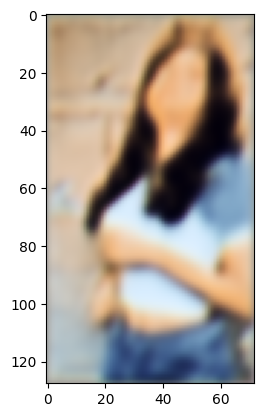

Epoch 11/100, Train_Loss: 703.72, Avg: 703.72
Epoch 12/100, Train_Loss: 695.94, Avg: 695.94
Epoch 13/100, Train_Loss: 696.00, Avg: 696.00
Epoch 14/100, Train_Loss: 688.44, Avg: 688.44
Epoch 15/100, Train_Loss: 687.16, Avg: 687.16
Epoch 16/100, Train_Loss: 681.91, Avg: 681.91
Epoch 17/100, Train_Loss: 677.89, Avg: 677.89
Epoch 18/100, Train_Loss: 675.54, Avg: 675.54
Epoch 19/100, Train_Loss: 669.63, Avg: 669.63
Epoch 20/100, Train_Loss: 668.07, Avg: 668.07


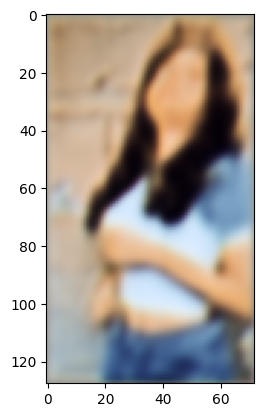

Epoch 21/100, Train_Loss: 663.12, Avg: 663.12
Epoch 22/100, Train_Loss: 659.62, Avg: 659.62
Epoch 23/100, Train_Loss: 657.04, Avg: 657.04
Epoch 24/100, Train_Loss: 652.00, Avg: 652.00
Epoch 25/100, Train_Loss: 649.60, Avg: 649.60
Epoch 26/100, Train_Loss: 645.81, Avg: 645.81
Epoch 27/100, Train_Loss: 641.67, Avg: 641.67
Epoch 28/100, Train_Loss: 639.18, Avg: 639.18
Epoch 29/100, Train_Loss: 635.11, Avg: 635.11
Epoch 30/100, Train_Loss: 631.66, Avg: 631.66


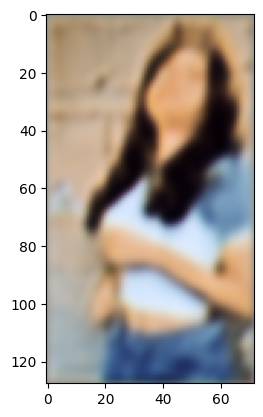

Epoch 31/100, Train_Loss: 629.09, Avg: 629.09
Epoch 32/100, Train_Loss: 625.32, Avg: 625.32
Epoch 33/100, Train_Loss: 621.97, Avg: 621.97
Epoch 34/100, Train_Loss: 619.34, Avg: 619.34
Epoch 35/100, Train_Loss: 615.92, Avg: 615.92
Epoch 36/100, Train_Loss: 612.45, Avg: 612.45
Epoch 37/100, Train_Loss: 609.78, Avg: 609.78
Epoch 38/100, Train_Loss: 607.31, Avg: 607.31
Epoch 39/100, Train_Loss: 604.26, Avg: 604.26
Epoch 40/100, Train_Loss: 600.86, Avg: 600.86


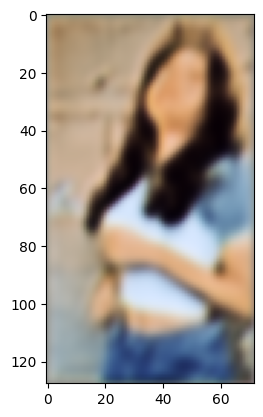

Epoch 41/100, Train_Loss: 597.64, Avg: 597.64
Epoch 42/100, Train_Loss: 594.87, Avg: 594.87
Epoch 43/100, Train_Loss: 592.38, Avg: 592.38
Epoch 44/100, Train_Loss: 589.91, Avg: 589.91
Epoch 45/100, Train_Loss: 587.44, Avg: 587.44
Epoch 46/100, Train_Loss: 585.03, Avg: 585.03
Epoch 47/100, Train_Loss: 582.65, Avg: 582.65
Epoch 48/100, Train_Loss: 580.33, Avg: 580.33
Epoch 49/100, Train_Loss: 577.90, Avg: 577.90
Epoch 50/100, Train_Loss: 575.35, Avg: 575.35


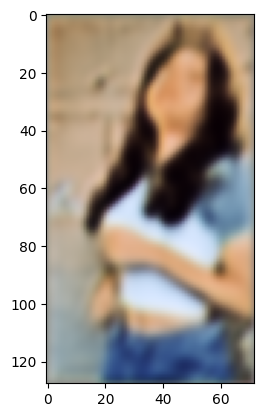

Epoch 51/100, Train_Loss: 572.54, Avg: 572.54
Epoch 52/100, Train_Loss: 569.63, Avg: 569.63
Epoch 53/100, Train_Loss: 566.68, Avg: 566.68
Epoch 54/100, Train_Loss: 563.79, Avg: 563.79
Epoch 55/100, Train_Loss: 561.09, Avg: 561.09
Epoch 56/100, Train_Loss: 558.51, Avg: 558.51
Epoch 57/100, Train_Loss: 556.09, Avg: 556.09
Epoch 58/100, Train_Loss: 553.77, Avg: 553.77
Epoch 59/100, Train_Loss: 551.55, Avg: 551.55
Epoch 60/100, Train_Loss: 549.48, Avg: 549.48


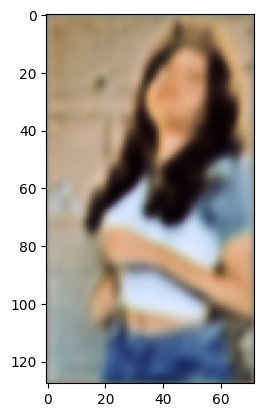

Epoch 61/100, Train_Loss: 547.92, Avg: 547.92
Epoch 62/100, Train_Loss: 548.11, Avg: 548.11
Epoch 63/100, Train_Loss: 554.28, Avg: 554.28
Epoch 64/100, Train_Loss: 574.49, Avg: 574.49
Epoch 65/100, Train_Loss: 589.62, Avg: 589.62
Epoch 66/100, Train_Loss: 554.82, Avg: 554.82
Epoch 67/100, Train_Loss: 540.40, Avg: 540.40
Epoch 68/100, Train_Loss: 564.60, Avg: 564.60
Epoch 69/100, Train_Loss: 540.73, Avg: 540.73
Epoch 70/100, Train_Loss: 539.96, Avg: 539.96


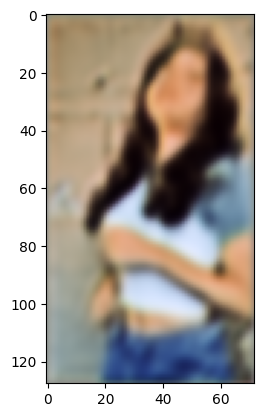

Epoch 71/100, Train_Loss: 550.05, Avg: 550.05
Epoch 72/100, Train_Loss: 529.28, Avg: 529.28
Epoch 73/100, Train_Loss: 541.84, Avg: 541.84
Epoch 74/100, Train_Loss: 532.51, Avg: 532.51
Epoch 75/100, Train_Loss: 528.96, Avg: 528.96
Epoch 76/100, Train_Loss: 534.76, Avg: 534.76
Epoch 77/100, Train_Loss: 522.04, Avg: 522.04
Epoch 78/100, Train_Loss: 529.53, Avg: 529.53
Epoch 79/100, Train_Loss: 522.85, Avg: 522.85
Epoch 80/100, Train_Loss: 520.26, Avg: 520.26


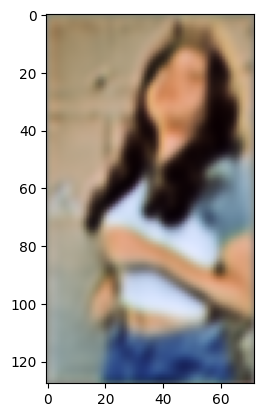

Epoch 81/100, Train_Loss: 523.77, Avg: 523.77
Epoch 82/100, Train_Loss: 515.41, Avg: 515.41
Epoch 83/100, Train_Loss: 519.26, Avg: 519.26
Epoch 84/100, Train_Loss: 515.96, Avg: 515.96
Epoch 85/100, Train_Loss: 512.39, Avg: 512.39
Epoch 86/100, Train_Loss: 515.32, Avg: 515.32
Epoch 87/100, Train_Loss: 509.95, Avg: 509.95
Epoch 88/100, Train_Loss: 510.06, Avg: 510.06
Epoch 89/100, Train_Loss: 510.12, Avg: 510.12
Epoch 90/100, Train_Loss: 505.80, Avg: 505.80


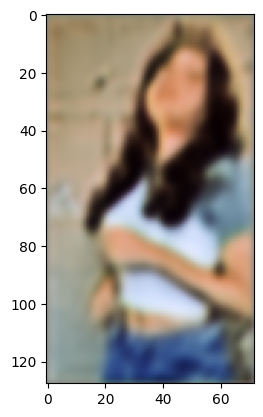

Epoch 91/100, Train_Loss: 507.08, Avg: 507.08
Epoch 92/100, Train_Loss: 505.32, Avg: 505.32
Epoch 93/100, Train_Loss: 502.64, Avg: 502.64
Epoch 94/100, Train_Loss: 503.56, Avg: 503.56
Epoch 95/100, Train_Loss: 501.18, Avg: 501.18
Epoch 96/100, Train_Loss: 499.66, Avg: 499.66
Epoch 97/100, Train_Loss: 499.94, Avg: 499.94
Epoch 98/100, Train_Loss: 497.60, Avg: 497.60
Epoch 99/100, Train_Loss: 496.61, Avg: 496.61
Epoch 100/100, Train_Loss: 496.48, Avg: 496.48


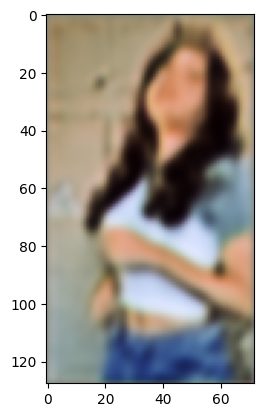

In [8]:
for epoch in range(EPOCHS):
    train_loss, avg_train_loss = train(model, train_loader, criterion, optimizer)
    #val_loss, avg_val_loss = evaluate(model, val_loader, criterion)
    
    # record the losses
    train_losses.append(avg_train_loss)
    #val_losses.append(avg_val_loss)

    # print every num times epoch only
    num = 1
    if ((epoch+1) % num == 0) or epoch == 0:
        if epoch == 0:
            time_took = (time.time() - start_time) / 60
            print(f'First epoch took {time_took:.1f} minutes.')
        print(f'Epoch {epoch+1}/{EPOCHS}, Train_Loss: {train_loss:.2f}, Avg: {avg_train_loss:.2f}')
    if ((epoch+1) % 10 == 0):
        check()